In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fs = 10
plt.style.use("tableau-colorblind10")
plt.rcParams["font.size"] = fs
plt.rcParams["axes.titlesize"] = plt.rcParams["font.size"]
plt.rcParams["lines.linewidth"] = 2.5
plt.rcParams["legend.handlelength"] = 1.5
plt.rcParams["legend.frameon"] = False

def cm2inch(x,y): return [x/2.54, y/2.54]

π = np.pi

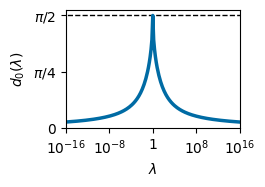

In [5]:
# d_0(λ)
D = np.loadtxt("./data_d0lambda.txt")
fig, ax = plt.subplots(1, 1, figsize=cm2inch(7,5), dpi=100)
ax.plot([1e-17, 1e17], [π/2, π/2], c="k", lw=1, ls="--")
ax.plot(D[:,0], D[:,1])
ax.set_xlabel("$\\lambda$")
ax.set_ylabel("$d_0(\\lambda)$")
ax.set_xscale("log")
ax.set_xlim(1e-16,1e+16)
ax.set_xticks([1e-16, 1e-8, 1, 1e8, 1e16])
ax.set_xticklabels(["$10^{-16}$","$10^{-8}$","$1$","$10^8$","$10^{16}$"])
ax.set_yticks([0, 0.25*π, 0.5*π])
ax.set_yticklabels(["0", "$\\pi/4$", "$\\pi/2$"])
# ax.set_title("Title")
fig.tight_layout()
fig.savefig("fig-d0lambda.pdf", fonttype=42, bbox_inches="tight")

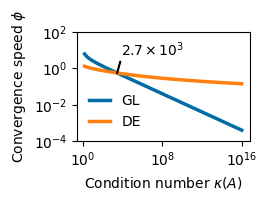

In [6]:
D = np.loadtxt("./data_convspeed.txt")
intersection = [2711.919364407967, 0.5578842198050705]
fig, ax = plt.subplots(1, 1, figsize=cm2inch(7,5), dpi=100)
ax.plot(D[:,0], D[:,1], label="GL")
ax.plot(D[:,0], D[:,2], label="DE")
ax.annotate("$2.7\\times 10^3$", xy=intersection, xytext=(7e3, 5e0),
            arrowprops={"color":"k", "width":0.5, "headwidth":0, "headlength":0.1})
ax.set_xlabel("Condition number $\\kappa(A)$")
ax.set_ylabel("Convergence speed $\\phi$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xticks([1e0, 1e8, 1e16])
ax.set_yticks([1e-4, 1e-2, 1e-0, 1e2,])
ax.legend()
fig.tight_layout()
fig.savefig("fig-convspeed.pdf", fonttype=42)

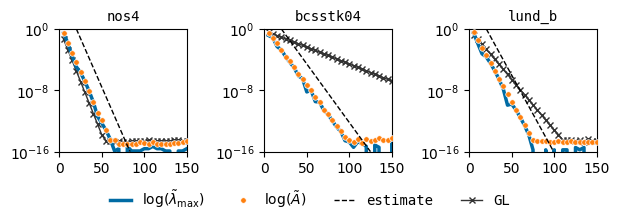

In [4]:
fig, ax = plt.subplots(1, 3, figsize=cm2inch(16, 4.7*1+1), dpi=100)

matnames = ["nos4", "bcsstk04", "lund_b"]
size = ["mat", "scalar"]

speeds = [0.583172138110826, 0.35115213086859126, 0.4648094562131017]

c = 1
est_x = []
est_y = []
for ϕ in speeds:
    m1, m2 = 0, 16*np.log(10)/(c*ϕ)
    est_x.append([m1+20, m2+20])
    est_y.append([c*np.exp(-ϕ*m1), c*np.exp(-ϕ*m2)])

Data = pd.read_csv("Result_Test2.csv")
x = Data["m"]

for i in range(3):
    y_mat = Data["%s_mat" % (matnames[i])]
    y_scalar = Data["%s_scalar" % (matnames[i])]
    y_gl = Data["%s_gl" % (matnames[i])]
    
    
    ax[i].plot(x, y_scalar, zorder=2)
    ax[i].plot(x, y_mat, marker="o", lw=0, ms=4, mec="w", mew=0.5, zorder=3)
    ax[i].plot(est_x[i], est_y[i], "k", ls="--", lw=1, zorder=4)
    ax[i].plot(x, y_gl, marker="x", lw=1, mew=1, ms=4, c="#333333", zorder=0)

    ax[i].set_title("%s" % (matnames[i]), family="DejaVu Sans Mono")
#     ax[i].set_xlabel("Abscissas")
#     ax[i].set_ylabel("Rel. Err. (2-norm)", labelpad=-2)
    ax[i].set_yscale("log")
    ax[i].set_xlim(0,150)
    ax[i].set_ylim(1e-16,1e0)
    ax[i].set_xticks([0,50,100,150])
    ax[i].set_yticks([1e-16,1e-8,1e0])
#     ax[i].legend(frameon=False, handlelength=1)

fig.legend(["$\\log(\\tilde{\\lambda}_{\\mathrm{max}})$", "$\\log(\\tilde{A})$", "estimate", "GL"],
           loc=8, ncol=4, fontsize=fs, frameon=False, prop={"family": "DejaVu Sans Mono"})
fig.tight_layout()
plt.subplots_adjust(bottom=0.3)
fig.savefig("test.pdf", fonttype=42)
plt.show()